In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

## Preparing Data

In [2]:
df = pd.read_csv('F://Uni/991/Pattern/SPR_HW4/inputs/P4/1KGP.txt', 
                 
                  sep="\s+",
                 header=None
)
#df.head()

In [3]:
#Calculating the mode in each column
mode=df.mode()
mode = mode.iloc[0]

In [5]:
#Creating the binary dataset
binary = df.loc[:,3:].eq(mode[3:],axis=1)
binary = binary.mask(binary==True, 0).mask(binary==False, 1).reset_index(drop=True)
#binary.head()

In [7]:
#Concatenating with the first two columns just to make it easier to address
dfbinary = pd.concat([df.loc[:,:2], binary],axis=1).reset_index(drop=True)
#dfbinary.head()

## PCA

In [9]:
pca = PCA()
pca.fit(binary)
eigvec = pca.components_

In [10]:
mean = binary.mean()
x_mean = binary - mean

## b

In [11]:
xnew_b = np.dot(eigvec[:2,:],x_mean.T).T

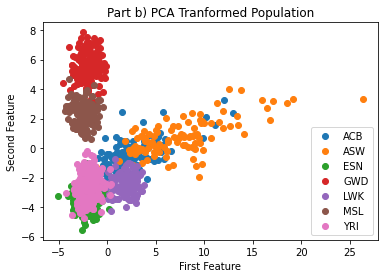

In [12]:
for val in np.unique(df[2]):
    plt.scatter(xnew_b[df[2]==val][:,0], xnew_b[df[2]==val][:,1], label=val)
    plt.legend()
    plt.title('Part b) PCA Tranformed Population')
    plt.xlabel('First Feature')
    plt.ylabel('Second Feature')
plt.show()

## d

In [13]:
xnew_d = np.dot(eigvec[[0,2],:],x_mean.T).T

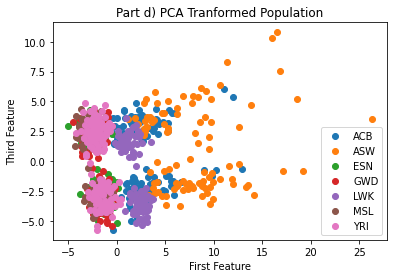

In [14]:
for val in np.unique(df[2]):
    plt.scatter(xnew_d[df[2]==val][:,0], xnew_d[df[2]==val][:,1], label=val)
    plt.legend()
    plt.title('Part d) PCA Tranformed Population')
    plt.xlabel('First Feature')
    plt.ylabel('Third Feature')
plt.show()

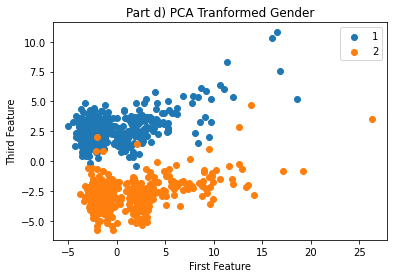

In [15]:
for val in np.unique(df[1]):
    plt.scatter(xnew_d[df[1]==val][:,0], xnew_d[df[1]==val][:,1], label=val)
    plt.legend()
    plt.title('Part d) PCA Tranformed Gender')
    plt.xlabel('First Feature')
    plt.ylabel('Third Feature')
plt.show()

## f

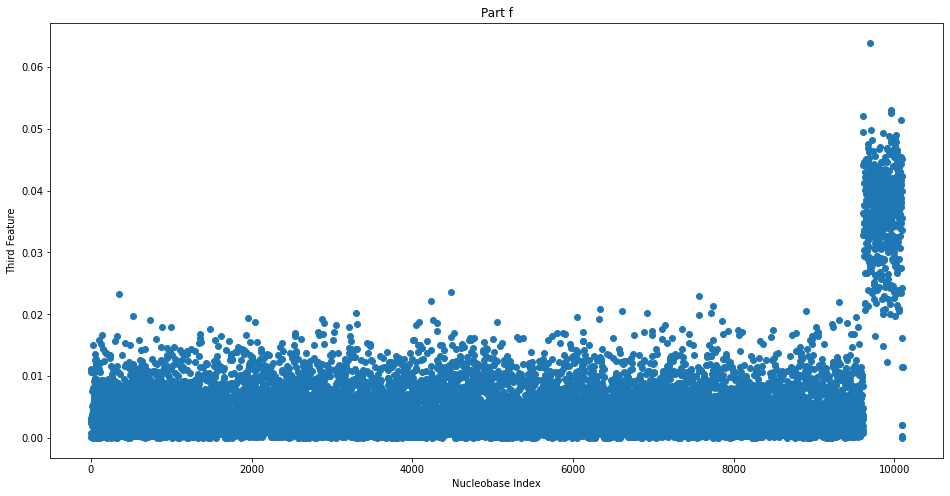

In [16]:
fig = plt.figure(figsize=(16,8))
plt.scatter(np.arange(1,10102,1),np.absolute(eigvec[[2],:]))
plt.title('Part f')
plt.xlabel('Nucleobase Index')
plt.ylabel('Third Feature')
plt.show()